# Data/Domain Understanding and Exploration

## Meaning and Type of Features; Analysis of Distributions

**Importing Required Libraries**

In [1]:
import sys
sys.path.append('')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
from scipy.stats import probplot

**Loading the Dataset**

In [2]:
df = pd.read_csv('./adverts.csv')

**Creating and Previewing a Sample Dataset**  
The output table presents a preview of the sampled data with various columns like public_reference, mileage, reg_code, standard_colour, and others. Each row corresponds to a vehicle listing, showcasing details such as make, model, year of registration, price, and fuel type.

In [3]:
df_sample = df.sample(frac=0.2, random_state=42)
df_sample.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
332044,202010074692259,2826.0,69,Silver,Volkswagen,Sharan,USED,2019.0,23000,MPV,False,Diesel
173955,202009023198786,10601.0,19,Red,Nissan,Qashqai,USED,2019.0,16000,SUV,False,Petrol
367464,202007221569681,23000.0,58,Silver,Honda,Jazz,USED,2008.0,4799,Hatchback,False,Petrol
47695,202009113590641,9419.0,17,Silver,Volkswagen,Polo,USED,2017.0,11000,Hatchback,False,Petrol
210184,202010195186332,113250.0,16,Grey,Vauxhall,Insignia,USED,2016.0,5400,Hatchback,False,Diesel


**Reviewing Data Types in the DataFrame**  
Numerical types like 'int64' and 'float64' are used for columns such as 'public_reference', 'mileage', 'year_of_registration', and 'price', which involve quantitative values.
The 'object' type, typically for strings, is used for categorical data such as 'reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', and 'fuel_type'.
The 'bool' type is assigned to the 'crossover_car_and_van' column, indicating boolean values.

In [4]:
df.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

**Missing Values in the Dataset**  
The impact of the missing values on the dataset's overall integrity needs to be considered in subsequent steps of the project.

In [5]:
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

**Overview of Unique Vehicle Colors**  
The analysis of the 'standard_colour' column's unique values provides insight into the diversity of vehicle colors available in the dataset. The dataset includes a wide range of colors such as Grey, Blue, Brown, Red, Bronze, Black, White, Silver, and more.


In [6]:
df['standard_colour'].unique()

array(['Grey', 'Blue', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', nan, 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Multicolour', 'Beige', 'Burgundy', 'Pink', 'Maroon',
       'Magenta', 'Navy', 'Indigo'], dtype=object)

**Statistical Summary of Vehicle Mileage**  
Count: 401,878 entries, indicating the number of vehicles with recorded mileage.  
Mean: The average mileage is approximately 37,743 miles.
Standard Deviation: A standard deviation of about 34,831 miles, reflecting a wide range of vehicle mileages.  
Minimum Mileage: The lowest recorded mileage is 0 miles, indicating new vehicles.   
25% Percentile: At 10,481 miles, indicating that 25% of vehicles have mileage below this value.  
Median (50% Percentile): At 28,629 miles, half of the vehicles have less mileage, and half have more.  
75% Percentile: At 56,875 miles, 75% of the vehicles have mileage below this value.  
Maximum Mileage: The highest recorded mileage is 999,999 miles, which may suggest outliers or errors.  

In [7]:
df['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

**Price and Registration Year Insights**  
The dataset's 'price' and 'year_of_registration' columns are analyzed to understand the pricing range and the median registration year of the vehicles:  
Minimum Price: The lowest price in the dataset is $120.  
Maximum Price: The highest price is $9,999,999, which suggests possible outliers in pricing.  
Median Year of Registration: The median year of registration is 2016, showing that half of the vehicles were registered on or before this year.

In [8]:
df['price'].min(), df['price'].max(), df['year_of_registration'].median()

(120, 9999999, 2016.0)

The mode of the 'fuel_type' column reveals the most frequently occurring value in this category. The output indicates that 'Petrol' is the most common fuel type among the vehicles in the dataset.

In [9]:
df['fuel_type'].mode()

0    Petrol
Name: fuel_type, dtype: object

**Vehicle Registrations**  
75th Percentile of Year of Registration: The 75th percentile for the year of registration is 2018. This means that 75% of the vehicles were registered on or before 2018.

In [10]:
df['year_of_registration'].quantile(0.75)

2018.0

**Skewness in Vehicle Price Distribution**  
The skewness of the 'price' column is calculated to be approximately 154.68. This extremely high skewness value indicates a distribution that is heavily skewed to the right. In practical terms, this suggests that while most vehicles are priced relatively low, there are a few vehicles with very high prices that significantly shift the average, distorting the typical value distribution.

In [11]:
df['price'].skew()

154.68152711899864

## Analysis of Predictive Power of Features 

**Correlation Analysis Among Mileage, Year of Registration, and Price**  
The heatmap of the correlation matrix between 'mileage', 'year_of_registration', and 'price' provides insights into the possible linear correlation between features.

(-0.16) and (0.1): The weak negative and positive correlation between 'mileage', 'year_of_registration', and 'price' suggests that 'mileage' and 'year_of_registration' has a limited linear predictive power for 'price'. However, there might be a non-linear relationship that Pearson correlation cannot detect.

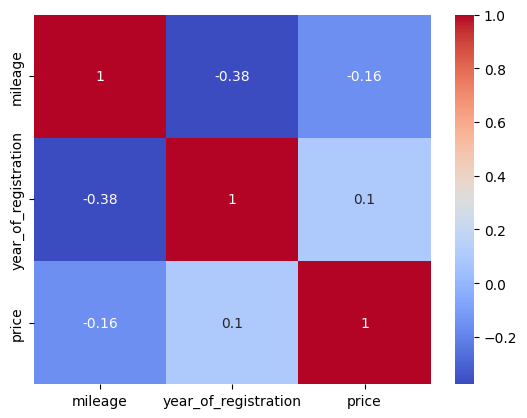

In [12]:
df_numeric = df[["mileage", "year_of_registration", "price"]]
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The grouped statistical data on vehicle prices by fuel type can provide insights into the predictive power of the 'fuel_type' feature for vehicle prices:

The data shows significant differences in mean, median, first quartile (Q1), and third quartile (Q3) prices among various fuel types. This indicates that 'fuel_type' is a distinguishing factor in predicting vehicle prices.

In [13]:
grouped = df.groupby('fuel_type')['price'].agg(
    mean='mean',
    median='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75))

grouped

,mean,median,Q1,Q3
fuel_type,,,,
Bi Fuel,14630.524887,14000.0,11945.00,15421.0
Diesel,16505.048387,13495.0,8250.00,20495.0
Diesel Hybrid,40469.160371,39990.0,31990.00,51530.5
Diesel Plug-in Hybrid,35633.691892,35991.0,32444.00,39890.0
Electric,32752.126072,27894.0,18955.00,36500.0
Natural Gas,3795.000000,3795.0,3795.00,3795.0
Petrol,16620.439950,11000.0,6495.00,18042.0
Petrol Hybrid,20289.115351,17814.0,12499.00,24355.0
Petrol Plug-in Hybrid,35986.686851,30995.0,19288.75,43895.0


## Data Processing for Data Exploration and Visualisation

To enhance data visualization and have a more nuanced exploration of vehicle prices, the dataset's 'price' column has been segmented into distinct bins. These bins help categorize vehicles into different price ranges, allowing for a clearer analysis of price distribution across the dataset.

This graphical representation shows that a significant number of vehicles are priced between $120 and $7495, indicating a large segment for low priced vehicles. Conversely, the high-end segment ($20000 to $999999) also shows a substantial number, reflecting a notable presence of high priced vehicles.

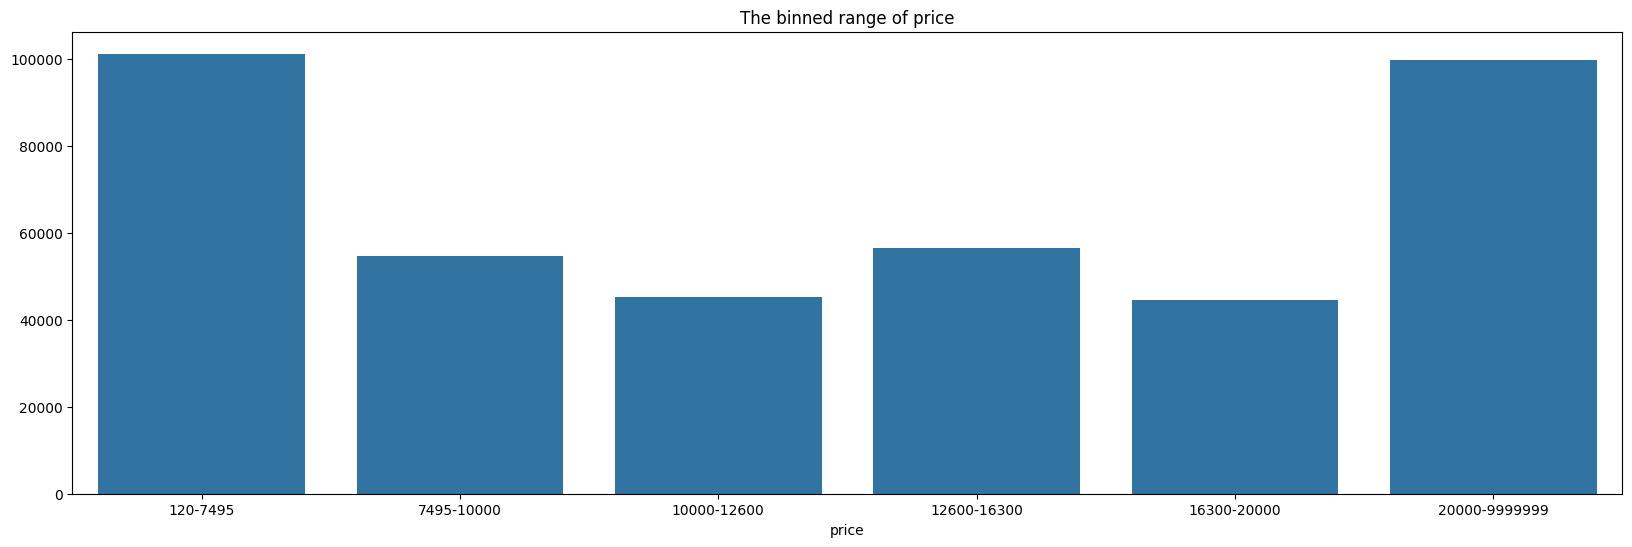

In [14]:
bins = [120, 7495, 10000, 12600, 16300, 20000, 9999999]
labels = ["120-7495","7495-10000", "10000-12600","12600-16300", "16300-20000", "20000-9999999"]
price_binned = pd.cut(df["price"], bins, right=True, labels=labels)
bins_on_x = price_binned.value_counts().sort_index()

plt.figure(figsize=(20,6))
sns.barplot(y = bins_on_x.values, x = bins_on_x.index.astype(str))
plt.title("The binned range of price")
plt.show()

**Vehicle Body Type Distribution**  
To streamline the analysis of vehicle body types in the dataset, a threshold-based grouping approach has been applied. Based on a defined occurrence threshold, the distribution of vehicle body types are visualized by aggregating less common types into a single "Other" category.  
Threshold Setting: A count threshold of 16,000 has been set. Body types occurring fewer than 16,000 times in the dataset are classified as "Other."

<Axes: ylabel='count'>

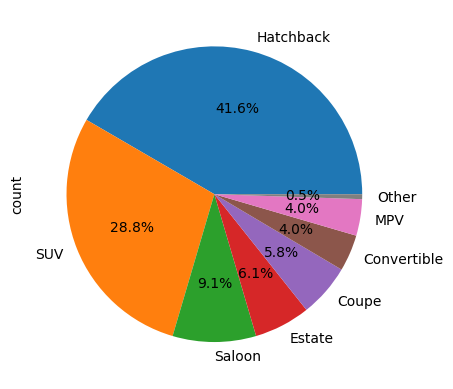

In [15]:
body_type_counts = df["body_type"].value_counts(dropna=False)
threshold = 16000
df_other = df.copy()
df_other['body_type_grouped']  = df_other['body_type'].apply(lambda x: x if body_type_counts[x] > 16000 else "Other")
body_type_grouped = df_other['body_type_grouped'].value_counts()
df_other['body_type_grouped'].value_counts().plot(kind="pie", labels=body_type_grouped.index, autopct='%1.1f%%')

# Data Processing for Machine Learning

## Dealing with Missing Values, Outliers, and Noise

**Dealing with Outliers in Vehicle Pricing**  
This step involves identifying and removing the outliers to ensure more accurate and representative statistical analysis.

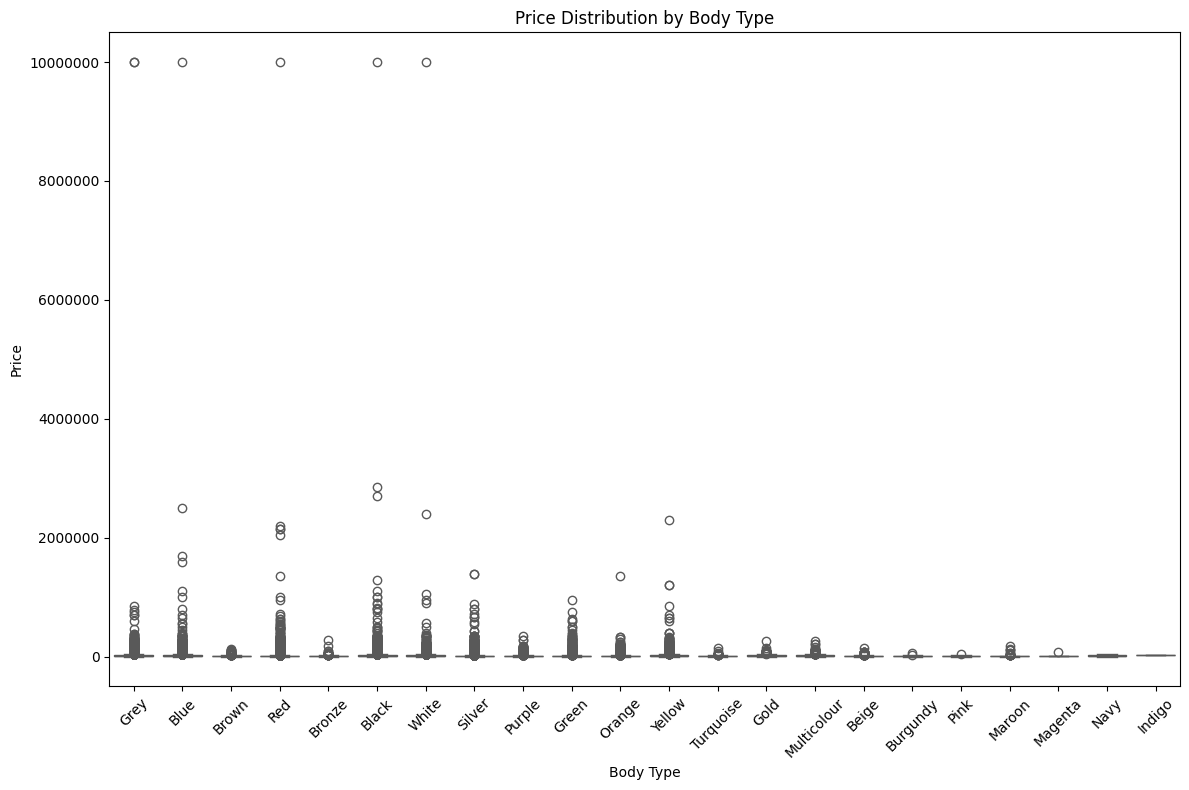

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='standard_colour', y='price', palette='Set2')

plt.title('Price Distribution by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')

plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

By removing these high-price outliers, the dataset's price distribution becomes more normalized, enhancing the predictive power of models.

In [17]:
indices_to_drop = df.loc[df['price'] == 9999999].index
df.drop(indices_to_drop, inplace= True)

**Imputation of Missing 'Standard Colour' Values Based on Body Type**  
Initially, the dataset contained 5,378 missing entries for vehicle color. 

In [18]:
nan_count = df['standard_colour'].isnull().sum()
nan_count

5378

To fill these gaps without introducing bias, colors were imputed based on the most commonly associated color with each vehicle body type. These are reflected on the visualized bar plot which shows the correlation between body type and color. Decisions about to replace the NAN with which color are inferred from this plot.

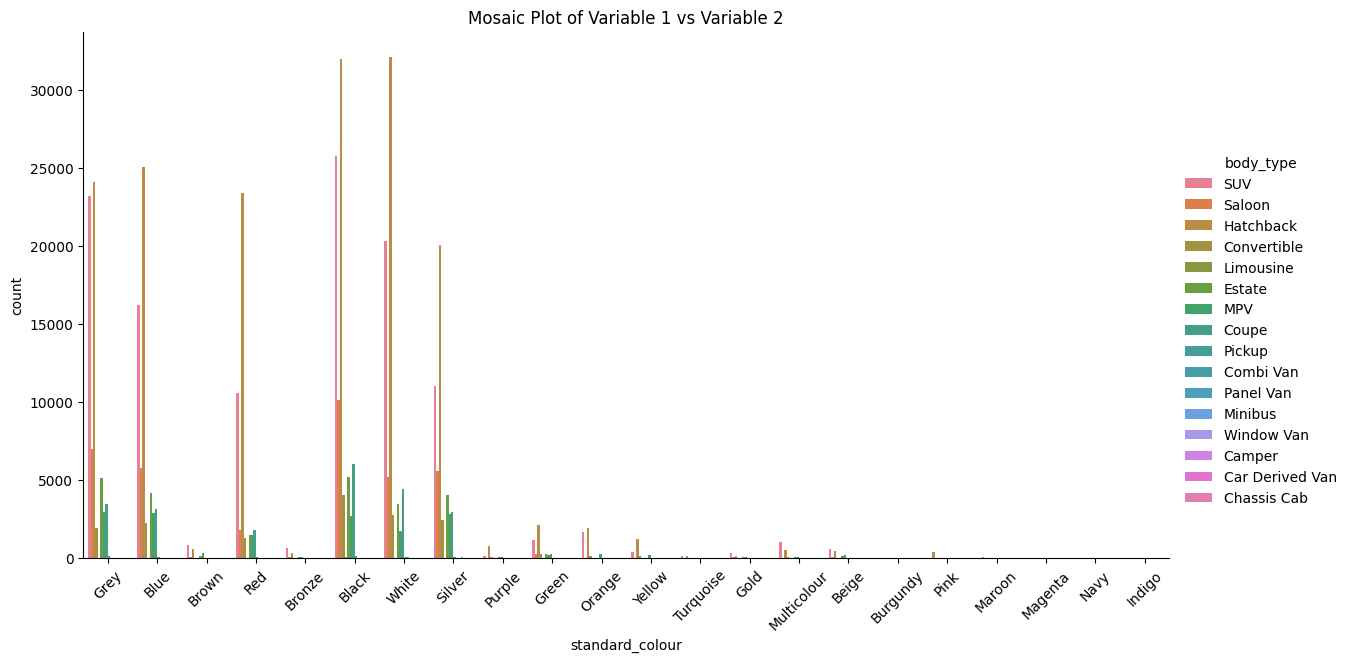

In [19]:
g = sns.catplot(x='standard_colour', hue='body_type', kind='count', data=df, height=6, aspect=2)
plt.title('Mosaic Plot of Variable 1 vs Variable 2')

# Rotating the x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

For example, SUVs are commonly black, while Hatchbacks are often white.

In [20]:
body_type_to_color = {
    'SUV': 'Black',
    'Saloon': 'Black',
    'Hatchback': 'White',
    'Convertible': 'Black',
    'Limousine': 'Black',
    'Estate': 'Black',
    'MPV': 'Grey',
    'Coupe': 'Black'
}

def replace_nan_with_custom_color(row):
    if pd.isna(row['standard_colour']):
        return body_type_to_color.get(row['body_type'], df['standard_colour'].mode()[0])
    else:
        return row['standard_colour']

df['standard_colour'] = df.apply(replace_nan_with_custom_color, axis = 1)

df['standard_colour'].isnull().sum()

0

**Imputation of Missing 'Year of Registration' Values Using Mode**  
For the 'year_of_registration' column, missing values were addressed by imputing the mode of the column. The mode provides a statistically reasonable estimate that maintains the integrity of the data's temporal distribution.

In [21]:
mode_value_of_year_of_registration = df["year_of_registration"].mode()[0]
df["year_of_registration"].fillna(mode_value_of_year_of_registration, inplace=True)
df["year_of_registration"].isna().value_counts()

year_of_registration
False    401999
Name: count, dtype: int64

**Imputation of Missing 'Body Type' Values Based on 'Standard Make'**  
In handling missing values for the 'body_type' column, a structured imputation method was implemented based on 'standard_make'. The approach assigns the most common body type of the associated 'standard_make' to missing entries. If the 'standard_make' of a vehicle is empty or NAN in a particular data instance, that NAN in 'body_type' is replaced by the mode of 'body_type' column. This strategy helps to keep the patterns in the dataset not distort them.

In [22]:
for make in df['standard_make'].unique():

    mode_body_type = df[df['standard_make'] == make]['body_type'].mode()
    
    if mode_body_type.empty:
        mode_body_type = df['body_type'].mode()[0]  
    else:
        mode_body_type = mode_body_type[0]  
    
    df.loc[(df['standard_make'] == make) & (df['body_type'].isnull()), 'body_type'] = mode_body_type

**Imputation of Missing 'Fuel Type' Values Based on 'Standard Make'**  
The same approach as the previous ones to fill the missing values is employed here.

In [23]:
for make in df['standard_make'].unique():

    mode_fuel_type = df[df['standard_make'] == make]['fuel_type'].mode()
    
    if mode_fuel_type.empty:
        mode_fuel_type = df['fuel_type'].mode()[0]  
    else:
        mode_fuel_type = mode_fuel_type[0]  
    
    df.loc[(df['standard_make'] == make) & (df['fuel_type'].isnull()), 'fuel_type'] = mode_fuel_type

In [24]:
df.shape

(401999, 12)

**Imputation of Missing 'Mileage' Values Using Median**  
To address the issue of missing values in the 'mileage' column, the median value of the column was used for imputation. The median is more robust statistic than others since it is less affected by extreme values, and represents the central tendency of the data.

In [25]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)

In [26]:
df.shape

(401999, 12)

**Dealing with Outliers in Categorical Columns Based on Their Frequency**  
To address outliers in categorical columns, a frequency-based thresholding approach was implemented. This method filters out categories with occurrences below a specified threshold. This will enhance the predictie power of models as long as it will allow them to focus on correlations between features and not distracted by outliers. 
Setting: A threshold of 1000 occurrences was set. Categories with fewer than 1000 entries were considered outliers and excluded from the dataset.

In [27]:
for category_column in ["mileage", "standard_colour", "standard_make", "year_of_registration", "body_type", "fuel_type"]:
    category_counts = df[category_column].value_counts()
    valid_categories = category_counts[category_counts >= 250].index
    df = df[df[category_column].isin(valid_categories)]

##  Feature Engineering, Data Transformations, Feature Selection

**Feature Selection: Dropping Irrelevant Columns**  
"public_reference", "reg_code", and "standard_model" will be excluded from the dataset because the first one does not represent any impactful feature, the second one is redundant because there is already another feature ("year_of_registration") which represents this correlation and having 'reg_code' will just add complexity and dimensionality to the dataset, and the third one because of substantially high number of dimensionality, which makes the model super complex.

In [28]:
df = df.drop(columns = ["public_reference", "reg_code", "standard_model"], inplace=False, axis = 1)

**Feature Scaling Using MinMaxScaler**  
To normalize the numeric features to have them on a comparable scale, the 'MinMaxScaler' was applied to the following columns: 'mileage', 'year_of_registration', and 'price'. This scaling transforms the data to a range of 0 to 1 to standardize numeric features.

In [29]:
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
df.loc[: , ['mileage', 'year_of_registration','price']] = model.fit_transform(df.loc[: , ['mileage', 'year_of_registration','price']])
df.head(3)

,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.000000,Grey,Volvo,NEW,0.842105,0.061485,SUV,False,Petrol Plug-in Hybrid
3,0.321429,Brown,Vauxhall,USED,0.789474,0.006497,Hatchback,False,Diesel
4,0.457143,Grey,Land Rover,USED,0.736842,0.022333,SUV,False,Diesel


**One-Hot Encoding of Categorical Variables**  
To prepare the dataset for machine learning, categorical features were one-hot encoded. This process converts categorical data into a numerical format that machine learning models need. Each unique category in the 'vehicle_condition' and 'crossover_car_and_van' columns is transformed into a new feature column.

In [30]:
X = df.drop(columns=["price"])
y = df[["price"]]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')
encoded_data = ohe.fit_transform(X[['vehicle_condition', 'crossover_car_and_van']])
X[['vehicle_condition', 'crossover_car_and_van']] = encoded_data
X.head()

,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,0.000000,Grey,Volvo,0.0,0.842105,SUV,0.0,Petrol Plug-in Hybrid
3,0.321429,Brown,Vauxhall,1.0,0.789474,Hatchback,0.0,Diesel
4,0.457143,Grey,Land Rover,1.0,0.736842,SUV,0.0,Diesel
5,0.114286,Blue,Audi,1.0,0.842105,Convertible,0.0,Petrol
7,0.707143,Bronze,Land Rover,1.0,0.631579,SUV,0.0,Diesel


**Selective One-Hot Encoding for Top Categories**  
To streamline the dataset and reduce dimensionality, one-hot encoding was applied to three categorical columns: 'standard_colour', 'standard_make', and 'body_type'. But, this is done just on the five most frequent categories in each column. Less frequent categories were grouped under a generic "Other" category. Each unique value (including "Other") in the top categories was converted into a separate binary feature. This Simplifies the dataset while retaining the most informative categories for analysis and modeling.

In [31]:
for column in ["standard_colour", "standard_make", "body_type"]:
    top_5_categories = X[column].value_counts().nlargest(10).index
    X[column] = X[column].apply(lambda x: x if x in top_5_categories else 'Other')

columns_to_encode = ['standard_colour', 'standard_make', 'body_type']
ohe_2 = OneHotEncoder(sparse_output=False)
encoded_cols = ohe_2.fit_transform(X[columns_to_encode])

encoded_X = pd.DataFrame(encoded_cols, columns=ohe_2.get_feature_names_out(columns_to_encode), index=X.index)

X = X.drop(columns=columns_to_encode)
X = pd.concat([X, encoded_X], axis=1)

X.head()

,mileage,vehicle_condition,year_of_registration,crossover_car_and_van,fuel_type,standard_colour_Black,standard_colour_Blue,standard_colour_Green,standard_colour_Grey,standard_colour_Multicolour,...,standard_make_Vauxhall,standard_make_Volkswagen,body_type_Convertible,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_MPV,body_type_Pickup,body_type_SUV,body_type_Saloon
0,0.000000,0.0,0.842105,0.0,Petrol Plug-in Hybrid,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.321429,1.0,0.789474,0.0,Diesel,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.457143,1.0,0.736842,0.0,Diesel,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.114286,1.0,0.842105,0.0,Petrol,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.707143,1.0,0.631579,0.0,Diesel,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Target Encoding of 'fuel_type' and 'standard_make'**    
The 'fuel_type' column was encoded using target encoding to convert it into a numerical feature.   
The dataset was split into training and testing subsets to avoid data leakage.  
The output of the 'X_train.info()' function confirms that the all columns in the dataset have been successfully transformed to a numeric type (float64) and has no missing values.

In [32]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

te = ce.TargetEncoder()
X_train['fuel_type'] = te.fit_transform(X_train[['fuel_type']], y_train)
X_test['fuel_type'] = te.transform(X_test[['fuel_type']])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107967 entries, 112230 to 363225
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   mileage                      107967 non-null  float64
 1   vehicle_condition            107967 non-null  float64
 2   year_of_registration         107967 non-null  float64
 3   crossover_car_and_van        107967 non-null  float64
 4   fuel_type                    107967 non-null  float64
 5   standard_colour_Black        107967 non-null  float64
 6   standard_colour_Blue         107967 non-null  float64
 7   standard_colour_Green        107967 non-null  float64
 8   standard_colour_Grey         107967 non-null  float64
 9   standard_colour_Multicolour  107967 non-null  float64
 10  standard_colour_Orange       107967 non-null  float64
 11  standard_colour_Other        107967 non-null  float64
 12  standard_colour_Red          107967 non-null  float64
 13 

# Model Building

## Algorithm Selection, Model Instantiation and Configuration

**Model Building: Importing Regressors and Evaluation Tools**  
To build, train, and evaluate machine learning models, essential regressors, hyperparameter tuning utilities, and evaluation metrics are imported.

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_text

**Model Training: k-Nearest Neighbors, Decision Tree, and Linear Regression**  
Three models are trained on the dataset.  
Hyperparameter Configuration: Parameters for grid search included 'max_depth', 'min_samples_split', and 'min_samples_leaf' with specific ranges.

In [34]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_params = {'max_depth': [3, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 5, 10, 50]}

In [38]:
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

## Grid Search, and Model Ranking and Selection

**Grid Search for Hyperparameter Optimization**  
A GridSearchCV object is used to perform hyperparameter tuning for the DecisionTreeRegressor model.
Best Parameters Identified are: 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 5

In [39]:
clf = GridSearchCV(tree, tree_params, return_train_score=True)
gs_results = clf.fit(X_train, y_train)
gs_results.best_params_

{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}


This columns of this dataframe provide a comprehensive view of how different combinations of hyperparameters performed during the grid search process.
It helps in identifying the most optimal settings for the model.

In [40]:
gs_df_2 = pd.DataFrame(gs_results.cv_results_)
gs_df_2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

**Top Grid Search Results**  
The DataFrame 'gs_df_2_sh' displays the top 4 results from the grid search based on the best 'rank_test_score'. The columns provide insights into the performance and parameter combinations.  
The 'mean_test_score' for the best parameter set is 0.7373, with a standard deviation of 0.047. The performance is almost reliable on the test data.

In [41]:
gs_df_2_sh = gs_df_2[ ['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')
gs_df_2_sh.head(4)

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
44,20,10,10,0.737338,0.012423,0.675535,0.047728,1
42,20,10,2,0.737338,0.012423,0.675526,0.047732,2
43,20,10,5,0.737338,0.012423,0.675402,0.047651,3
47,20,50,10,0.689543,0.013324,0.674411,0.048307,4


# Model Evaluation and Analysis

## Coarse-Grained Evaluation/Analysis


**Model Evaluation: K-Nearest Neighbors Training Score**  
The 'score' method evaluates the performance of the K-Nearest Neighbors (KNN) model on the training dataset.  
The score for the KNN model on the training data is 0.7432. It indicates that the model covers approximately 74.32% of the variance in the training data.

In [42]:
knn.score(X_train, y_train)

0.743221027874299

**Cross-Validation Mean Score for Linear Regression**  
The average performance of the linear regression model across 5-fold cross-validation is calculated. The 'cross_val_score' function evaluates the model on 5 different train-test splits of the training data (X_train, y_train). The mean cross-validation score for the linear regression model is 0.5491, which indicates a moderate level of predictive power. While the score is not particularly high, it suggests that the linear regression model captures half of the variance in the target variable.

In [43]:
scores = cross_val_score(linear, X_train, y_train, cv=5)
scores.mean()

0.5491184301833123

**Mean Absolute Error for Linear Regression**  
Purpose: The Mean Absolute Error (MAE) measures the average magnitude of errors between the predicted and actual values. It provides insight into the prediction accuracy of the linear regression model. The MAE was calculated by averaging the absolute differences between predicted and actual values in y_test. The MAE for the linear regression model is 0.0056. This indicates that the model's predictions deviate from the actual values by approximately 0.0056 units.

In [44]:
linear.fit(X_train, y_train)
mae = mean_absolute_error(y_test, linear.predict(X_test))
mae

0.0056016045901811935

**Cross-Validation Score for Decision Tree Regressor**  
The mean cross-validation score for the decision tree model is 0.6755. This score is relatively higher than that of simpler models like linear regression.

In [45]:
tree_2 = DecisionTreeRegressor(max_depth= 20, min_samples_leaf = 10, min_samples_split = 5)
scores = cross_val_score(tree_2, X_train, y_train, cv=5)
scores.mean()

0.6755114538602205

**Decision Tree Regressor Test Score**  
To evaluate the performance of the DecisionTreeRegressor on the test dataset after training. The score on the test dataset is 0.6294. This test score is slightly lower than the cross-validation score (0.6755), suggesting that the model generalizes well and performs well on unseen data.


In [46]:
tree_2.fit(X_train, y_train)
tree_2.score(X_test, y_test)

0.629462596128885

## Feature Importance

**Extract Feature Importances**  
Tree-based models calculate feature importance based on the reduction in the impurity achieved by splitting on a particular feature.  
The feature mileage has the highest importance score of 0.4722, indicating it is the most influential variable in predicting the target.

In [47]:
feature_importances = tree.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(4)

,Feature,Importance
0,mileage,0.472463
30,body_type_Hatchback,0.115147
2,year_of_registration,0.087954
19,standard_make_Land Rover,0.073568


**Structure of Decision Tree Regressor**  
Features that appear in the early layers of a decision tree tend to be more important because they have a larger impact on the resulting prediction. The visualized tree proves the previous achieved results as it represents again that 'mileage', 'year_of_registration' and generated 'body_type_Hatchback'feature are the most important features of the model.

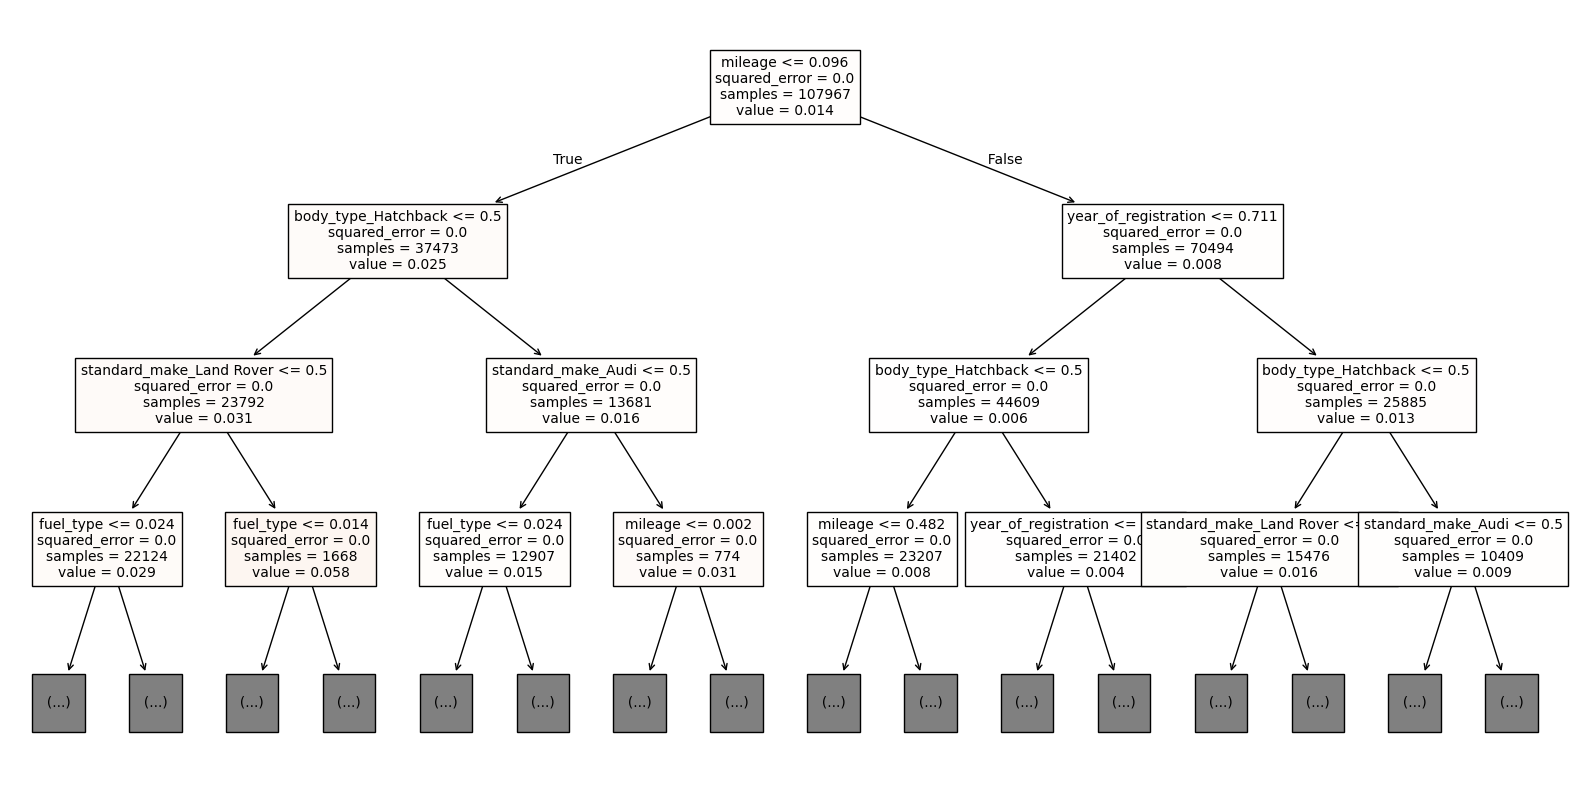

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)
plt.show()

## Fine-Grained Evaluation

**Fine-grained Evaluation with Predictions vs. Actual Values**  
The first few predictions of the KNeighborsRegressor model (y_pred) with the actual target values from the test dataset (y_test) are compared. The predictions are relatively close to the actual values for the first five instances. For instance, the first predicted value (0.0029) is slightly higher than the actual value (0.0014). This suggests that the model performs reasonably well.

In [49]:
y_pred = knn.predict(X_test)
y_pred[:5]

array([[0.00292165],
       [0.00735606],
       [0.02316619],
       [0.00389032],
       [0.01639073]])

In [50]:
y_test.head(5).to_numpy()

array([[0.00141274],
       [0.00759627],
       [0.02317053],
       [0.00548425],
       [0.01962827]])

**Confusion Matrix**  
The confusion matrix is represented, which measures predictive performance of the model. The result indicates that almost all of the actual values fall between 0-0.25, when the model's predicted value is also in that class.

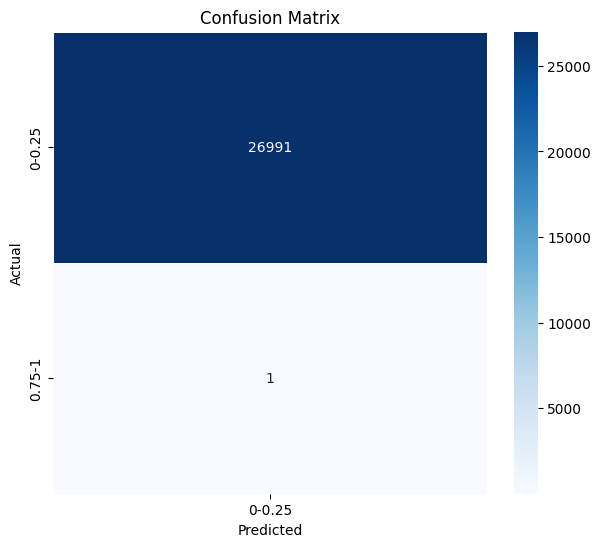

In [51]:
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

y_test_binned = pd.cut(y_test['price'], bins=bins, labels=labels, include_lowest=True)
y_pred = y_pred.ravel()
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True)

confusion_matrix = pd.crosstab(y_test_binned, y_pred_binned, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Partial Dependence Plots**  
This shows the partial dependence value, which quantifies the average predicted outcome when a feature changes, holding all other features constant.  
For example, the second plot shows a linear upward trend, indicating that as the year of registration increases (i.e., newer vehicles), the model predicts higher values for the target variable. 

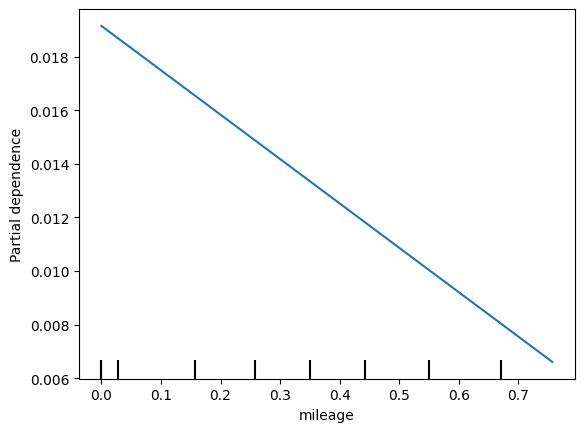

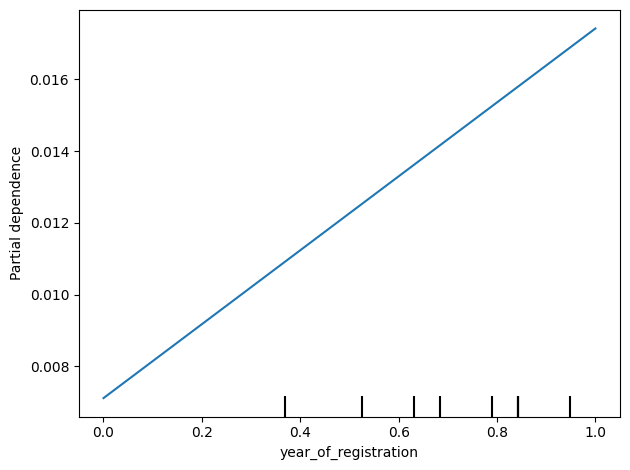

In [52]:
from sklearn.inspection import PartialDependenceDisplay

features_1 = [0] 
PartialDependenceDisplay.from_estimator(linear, X_train, features_1)
features_2 = [2] 
PartialDependenceDisplay.from_estimator(linear, X_train, features_2)

plt.tight_layout()
plt.show()